In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import json
import os


%matplotlib inline 

In [ ]:
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib qt5

### Load Data

In [ ]:
data = pd.read_csv('D:\Desmond\Intern\kkday\kk_message.csv_20180101_20181231.csv')

In [6]:
product_label = pd.read_csv(r'D:\Desmond\Intern\kkday\data\product_df.csv')

In [2]:
with open(r'D:\Desmond\Intern\kkday\data\1.json',encoding='UTF-8') as file:
     diag_data = json.loads(file.read())

In [3]:
diag_data['10691']

[{'question': ['變壓器晚上還能使用,早上就發現無法過電,換過插座也是無法使用,並非人為損壞,請問該如何處理.'],
  'answer': ['您好，感謝您的訊息。\n關於此情形會為您進行備註，並待您歸還後會為您進行檢測與確認。\n另外與您確認一下，您目前手邊有其他變壓器或行動電源等配備能夠進行充電嗎？\n還有是否方便您提供您的訂單編號，這邊會再為您確認，謝謝您。-WW-'],
  'lang': 'zh-tw'},
 {'question': ['Is that work in Fujisan?'],
  'answer': ['富士山收訊比較不穩喔 是屬於山區。'],
  'lang': 'zh-tw'},
 {'question': ['請問這已經沒有機台可以預約了嗎? 因為我找不到這商品的選項了'],
  'answer': ['您好，\n\n目前尚有庫存可以選擇唷，\n請問您出發日期是什麼時候呢?'],
  'lang': 'zh-tw'},
 {'question': ['你好，我好奇我的航班行程（路线）能不能还机。\n我的回程航班是从大阪Itami机场直达成田，转机回国。谢谢'],
  'answer': ['您好，因大阪伊丹機場未有合作櫃台，以下是成田櫃台地點與時間，正確的轉機入線需要到成田機場官網查詢，請您參考，謝謝您。\n．成田國際機場第一航廈\n領取地點：國際線入境大廳，北翼1樓QL LINER櫃台\n服務時間：06:00 - 當天最後一班航班抵達為止\n注意事項：南翼的QL LINER櫃台不可領取機器\n\n歸還地點：國際線出境樓，南／北翼4樓QL LINER櫃台\n服務時間：07:00 - 21:00\n注意事項：南北翼的QL LINER櫃台都可歸還機器\n\n．成田機場第二航廈\n領取地點：國際線入境大廳，1樓QL LINER櫃台\n服務時間：06:00 - 當天最後一班航班抵達為止\n\n歸還地點：國際線出境樓，3樓QL LINER櫃台\n服務時間：07:00 - 21:00'],
  'lang': 'zh-tw'},
 {'question': ['Hi.\nI have placed order of sim card from your website and collected the Sim Card fro

###  Looking Data

In [ ]:
data[(data.parent_msg_oid==0) & (data.prod_oid==9574)]

In [ ]:
data[data.parent_msg_oid==4252004]

In [ ]:
data[data.parent_msg_oid==6501050]

In [ ]:
data[data.parent_msg_oid==17927]

In [ ]:
data[(data.parent_msg_oid==0) & (data.prod_oid==17927) ]

In [ ]:
len(data[(data.parent_msg_oid==0) & (data.prod_oid==17927)])

In [ ]:
data[data.prod_oid==11847]

In [ ]:
product_label.iloc[0:6]

### 計算每個tag的question數量

In [4]:
def q_count(tag_id):
    target_id=[]
    for idx, row in product_label.iterrows():
        if type(row[2]) == str:
            if tag_id in row[2]:
                target_id.append(row[1])
    
    count = 0
    for prod_id, prod_qa in diag_data.items():    
        if int(prod_id) in target_id:
            for j in prod_qa:
                count=count+len(j['question'])  
    return count
    

In [7]:
q_count('TAG_5_5')

21862

In [8]:
tot_tag = ['TAG_1_1','TAG_1_2','TAG_1_3','TAG_2_1','TAG_2_2','TAG_2_3','TAG_2_4','TAG_2_5','TAG_2_6',
           'TAG_3_1','TAG_3_2','TAG_3_3','TAG_3_4','TAG_3_5','TAG_3_6','TAG_4_1','TAG_4_2','TAG_4_3','TAG_4_4','TAG_4_5','TAG_4_6','TAG_4_7',
           'TAG_5_1','TAG_5_2','TAG_5_3','TAG_5_4','TAG_5_5','TAG_5_6']

tot_tag_cat=['刺激冒險','水上活動','戶外休閒','景點門票','博物館','主題樂園','運動賽事','餐廳訂位','特色表演','獨特體驗','當地美食',
             '身心療癒','DIY課程','逛街購物','文化節慶','城市觀光','文史藝術','自然生態','一日遊','多日遊','私人團','豪華郵輪',
            '交通票券','專車接送','租車自駕','遊船票券','WiFi & SIM卡','住宿訂房']

In [9]:
tag_q_dict={}

for i in tot_tag:
    tag_q_dict[i]=q_count(i)


In [10]:
tag_q_dict

{'TAG_1_1': 2914,
 'TAG_1_2': 8295,
 'TAG_1_3': 8433,
 'TAG_2_1': 28737,
 'TAG_2_2': 1867,
 'TAG_2_3': 15678,
 'TAG_2_4': 6,
 'TAG_2_5': 2434,
 'TAG_2_6': 2431,
 'TAG_3_1': 7058,
 'TAG_3_2': 4844,
 'TAG_3_3': 4663,
 'TAG_3_4': 1009,
 'TAG_3_5': 2803,
 'TAG_3_6': 2468,
 'TAG_4_1': 19933,
 'TAG_4_2': 16062,
 'TAG_4_3': 9813,
 'TAG_4_4': 57960,
 'TAG_4_5': 7286,
 'TAG_4_6': 11969,
 'TAG_4_7': 3610,
 'TAG_5_1': 22494,
 'TAG_5_2': 15128,
 'TAG_5_3': 3194,
 'TAG_5_4': 2094,
 'TAG_5_5': 21862,
 'TAG_5_6': 425}

### 將tag換成商品類別

In [11]:
mapping = {}
for i in range(len(tot_tag)):
    mapping[tot_tag[i]]=tot_tag_cat[i]

tag_cat_dict = dict((mapping[key], value) for (key, value) in tag_q_dict.items())

In [12]:
tag_cat_dict 

{'刺激冒險': 2914,
 '水上活動': 8295,
 '戶外休閒': 8433,
 '景點門票': 28737,
 '博物館': 1867,
 '主題樂園': 15678,
 '運動賽事': 6,
 '餐廳訂位': 2434,
 '特色表演': 2431,
 '獨特體驗': 7058,
 '當地美食': 4844,
 '身心療癒': 4663,
 'DIY課程': 1009,
 '逛街購物': 2803,
 '文化節慶': 2468,
 '城市觀光': 19933,
 '文史藝術': 16062,
 '自然生態': 9813,
 '一日遊': 57960,
 '多日遊': 7286,
 '私人團': 11969,
 '豪華郵輪': 3610,
 '交通票券': 22494,
 '專車接送': 15128,
 '租車自駕': 3194,
 '遊船票券': 2094,
 'WiFi & SIM卡': 21862,
 '住宿訂房': 425}

In [15]:
sorted_x= sorted(tag_cat_dict.items(), key=lambda kv: kv[1],reverse=True)

import collections
sorted_dict = collections.OrderedDict(sorted_x)

In [17]:
sorted_dict

OrderedDict([('一日遊', 57960),
             ('景點門票', 28737),
             ('交通票券', 22494),
             ('WiFi & SIM卡', 21862),
             ('城市觀光', 19933),
             ('文史藝術', 16062),
             ('主題樂園', 15678),
             ('專車接送', 15128),
             ('私人團', 11969),
             ('自然生態', 9813),
             ('戶外休閒', 8433),
             ('水上活動', 8295),
             ('多日遊', 7286),
             ('獨特體驗', 7058),
             ('當地美食', 4844),
             ('身心療癒', 4663),
             ('豪華郵輪', 3610),
             ('租車自駕', 3194),
             ('刺激冒險', 2914),
             ('逛街購物', 2803),
             ('文化節慶', 2468),
             ('餐廳訂位', 2434),
             ('特色表演', 2431),
             ('遊船票券', 2094),
             ('博物館', 1867),
             ('DIY課程', 1009),
             ('住宿訂房', 425),
             ('運動賽事', 6)])

### 計算總 TAG5_5(wifi, sim)佔總Question(zh-tw)比例
不能使用sum(tag_q_dict.values())作為total question number因一產品可能有多個TAG

In [18]:
tot_question = 0

for prod_id, prod_qa in diag_data.items():    
    for i in prod_qa:
        tot_question=tot_question+len(i['question'])    
    
    

In [19]:
ratio = tag_q_dict['TAG_5_5']/tot_question
print(tag_q_dict['TAG_5_5'])
print(tot_question)
print(ratio)

21862
152495
0.14336207744516213


In [20]:
tag_count_list=[]
for tag, q_count in tag_q_dict.items():
#     print(tag,':',round(q_count/tot_question,4))
    tag_count_list.append(q_count)

### 對tag作圖

<BarContainer object of 28 artists>

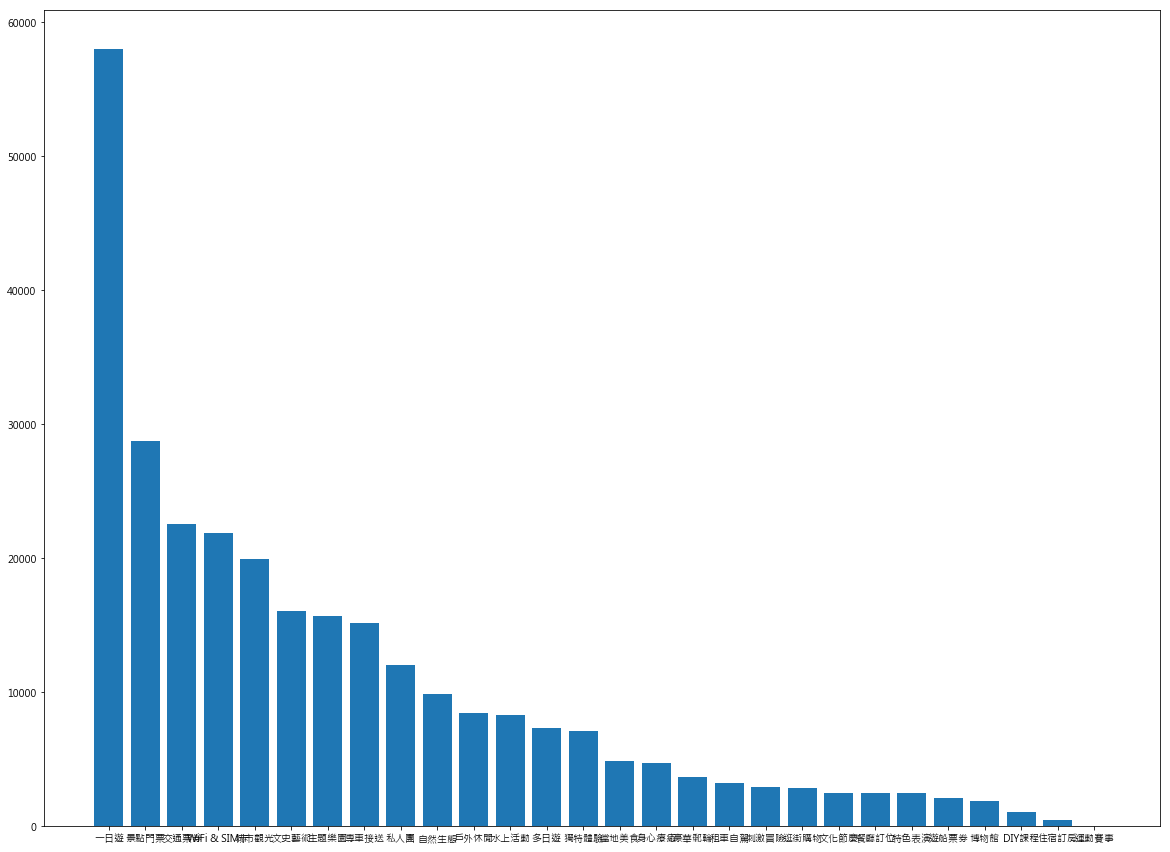

In [21]:
#長條圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,15))
plt.bar(sorted_dict.keys(),sorted_dict.values())

In [22]:
#圓餅圖
tag_select = ['TAG_2_1景點門票','TAG_4_4一日遊','TAG_5_1交通票券','TAG_5_5WiFi & SIM卡','其他']
tag_select_count = [28737,57960,22494,21862,21442]


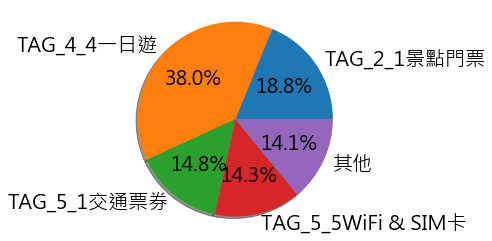

In [23]:
plt.pie(tag_select_count,               # 數值
        labels = tag_select,            # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 20},  # 文字大小
        shadow=True)       # 設定陰影

plt.axis('equal') 

plt.show()